# Pymaceuticals Inc.
---

### Analysis

- There is a positive correlation to the weight of the mice and the tumor size. I believe this to be a causation. 
- Tumor volume did see a significant trend of decreasing as the time spend using Capomulin increased.
- Capomulin and Ramicane have smaller tumor sizes than Ifunbinol and Seftamin. This may make it appear that Capmulin and Ramicane had better results, but seeing as their was a correlation between weight and tumor size, this is something that will have to be looked into with more depth. We would need to check the weights of mice as well as their tumor size.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(left=study_results, right=mouse_metadata, how="outer", on="Mouse ID")
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
combined_data['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data.loc[combined_data['Mouse ID'] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'],keep='last')
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_data['Mouse ID'].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = cleaned_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = cleaned_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = cleaned_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std = cleaned_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem = cleaned_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_summary = pd.DataFrame(
    {"Mean Tumor Volume": mean,
     "Median Tumor Volume": median,
     "Tumor Volume Variance": variance,
     "Tumor Volume Std. Dev.": std,
     "Tumor Volume Std. Err.": sem
     })

#Index Name
drug_summary.index.name = 'Drug Regimen'

# Display the DataFrame
drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
drug_summary2 = cleaned_data.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
drug_summary2

C:\Users\rocco\AppData\Local\Temp\ipykernel_15448\2400892533.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  drug_summary2 = cleaned_data.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

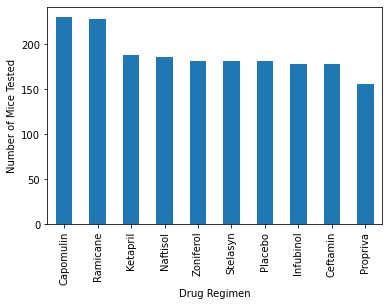

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen = cleaned_data["Drug Regimen"].value_counts()
figure1 = drug_regimen.plot(kind="bar",
                                xlabel="Drug Regimen",
                                ylabel="Number of Mice Tested")

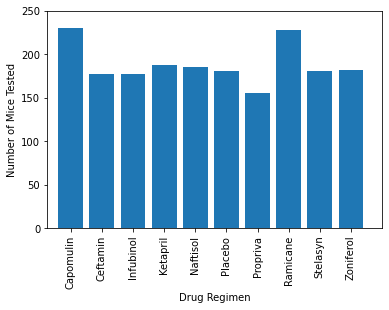

In [54]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y_axis = np.array(cleaned_data.groupby(["Drug Regimen"]).count()["Mouse ID"])
x_axis = np.arange(len(y_axis))
plt.xlim(-0.75, 10)
plt.ylim(0, 250)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks([value for value in x_axis],['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], rotation=90)
plt.bar(x_axis, y_axis)
plt.show()

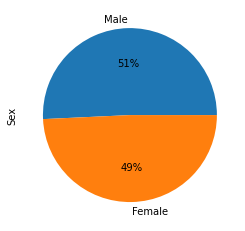

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = cleaned_data["Sex"].value_counts()
figure2 = gender.plot(kind="pie", autopct='%1.0f%%')

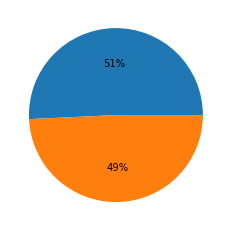

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender, autopct="%1.0f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [64]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_data.groupby(["Mouse ID"])['Timepoint'].max()
max_timepoint = pd.DataFrame(max_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint = max_timepoint.merge(cleaned_data, on=['Mouse ID','Timepoint'])
last_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [65]:
# Put treatments into a list for for loop (and later for plot labels)
sample_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in sample_drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = last_timepoint.loc[last_timepoint["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3-q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"{drug}'s potential outliers : {outliers}")

Capomulin's potential outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers : 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)


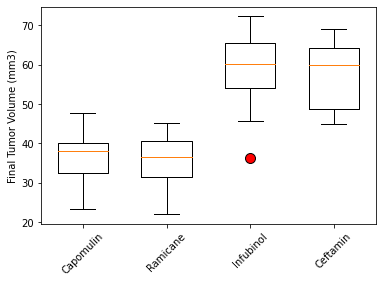

In [68]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_dict = dict(markerfacecolor='red',markersize=10)
plt.xticks(rotation = 45)
plt.ylabel('Final Tumor Volume (mm3)')
plt.boxplot(tumor_data, labels = sample_drugs, flierprops=boxplot_dict,widths=(.6))
plt.show()

## Line and Scatter Plots

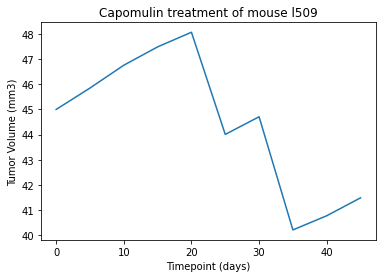

In [52]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = cleaned_data.loc[cleaned_data['Drug Regimen'] == "Capomulin"]
mouse_id = capomulin.loc[capomulin['Mouse ID']== 'l509']
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.plot(mouse_id['Timepoint'],mouse_id['Tumor Volume (mm3)'])
plt.show()

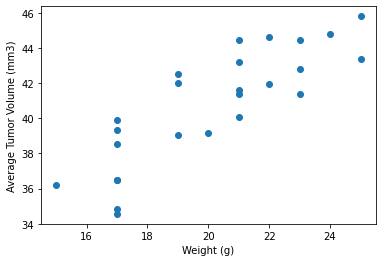

In [53]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_tumor = capomulin.groupby(["Mouse ID"]).mean()
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(average_tumor['Weight (g)'], average_tumor['Tumor Volume (mm3)'])
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


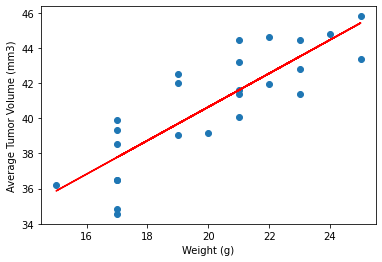

In [51]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(average_tumor['Weight (g)'],average_tumor['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is: {correlation}")

# Making Variables from the previous dot plot
weight = average_tumor['Weight (g)']
tumor_volume = average_tumor['Tumor Volume (mm3)']

# Calculating linear regression and saving slope and y-intercepts
regression  = st.linregress(weight, tumor_volume)
slope = regression[0]
y_intercept = regression[1]

# y=mx+b line
slope_int = weight * slope + y_intercept

# Plot the scatter plot with the trend line
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(weight, tumor_volume)
plt.plot(weight, slope_int, color='red')
plt.show()